In [2]:
#libraries
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import ast

#loading data
dataset=load_dataset('lukebarousse/data_jobs')
df=dataset['train'].to_pandas()
#cleaning
df['job_posted_date']=pd.to_datetime(df['job_posted_date'])
df['job_skills']=df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [3]:
df_exploded = df.explode('job_skills')

<Axes: xlabel='job_skills'>

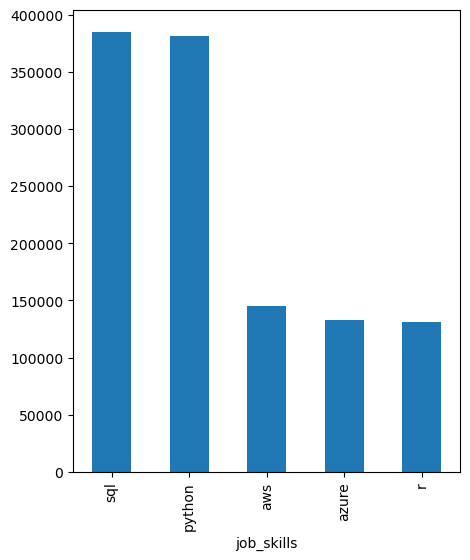

In [6]:
df_exploded['job_skills'].value_counts().head().plot(kind='bar', figsize=(5, 6))


In [14]:
skills_counts = df_exploded.groupby(['job_title_short','job_skills']).size()
df_skills_count = skills_counts.reset_index(name='counts')
df_skills_count = df_skills_count.sort_values(by='counts', ascending=False)
df_skills_count


,job_title_short,job_skills,counts
1066,Data Scientist,python,113711
865,Data Engineer,sql,113130
830,Data Engineer,python,108022
625,Data Analyst,sql,92428
1101,Data Scientist,sql,78982
...,...,...,...
462,Data Analyst,chainer,1
432,Cloud Engineer,wrike,1
410,Cloud Engineer,theano,1
24,Business Analyst,chainer,1


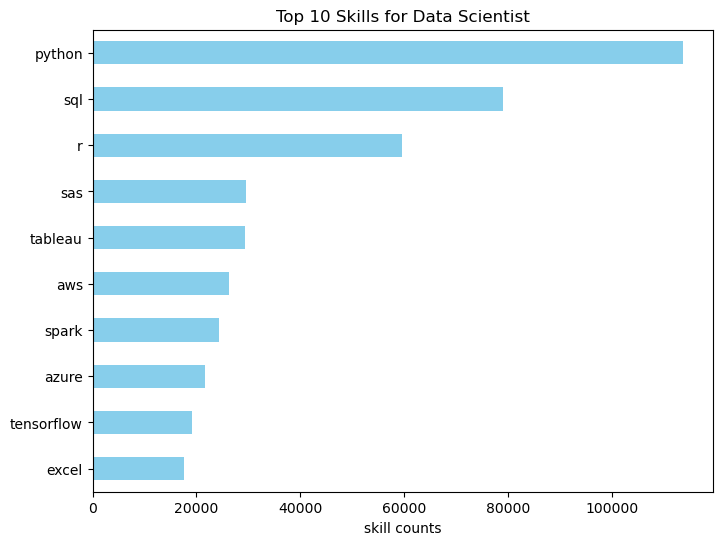

In [21]:
job_title = 'Data Scientist'
top_skill = 10
df_top_skills = df_skills_count[df_skills_count['job_title_short'] == job_title].head(top_skill)
df_top_skills.plot(kind='barh', x='job_skills', y='counts', 
                   figsize=(8, 6), 
                   title=f'Top {top_skill} Skills for {job_title}',
                   xlabel='skill counts',
                   ylabel='', 
                   color = 'skyblue',
                   legend = False
                   )
plt.gca().invert_yaxis()